# Risk

In [55]:
start = '2002-01-02'
end = '2015-11-09'
df = get_pricing('SPY', fields=['close_price'], start_date=start, end_date=end)

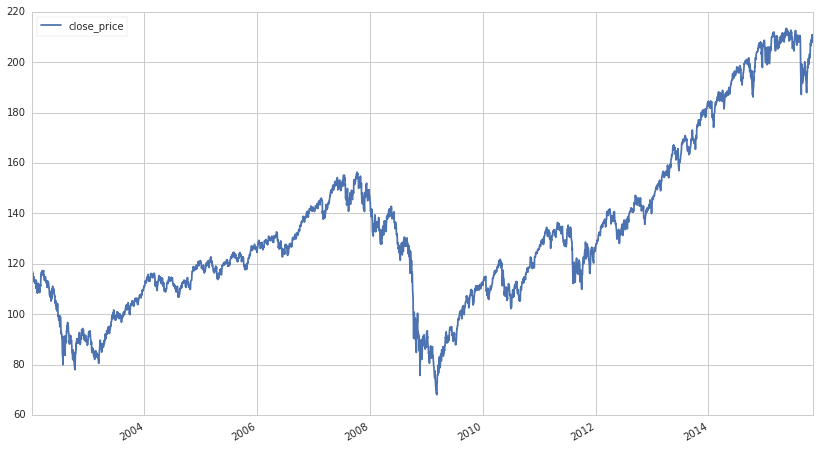

In [56]:
df.plot()

In [57]:
daily_returns = (df.close_price.shift(-1) - df.close_price) / df.close_price
df = df.ix[1:] # remove empty value
df['daily_returns'] = daily_returns

In [58]:
mean_annual_return = df.daily_returns.mean() * 252
annualized_std = df.daily_returns.std() * (252**.5)

In [59]:
mean_excess_return = mean_annual_return - .04
sharpe_ratio = mean_excess_return / annualized_std
opt_leverage = mean_excess_return / (annualized_std**2)

In [60]:
print sharpe_ratio

0.106973189664


In [61]:
print opt_leverage

0.545621394786


In [62]:
capital = 100000
purchase = int(capital * opt_leverage)
print "If the kelly optimal leverage is {} and you have {} to invest, you should \
buy (and/or borrow to buy) {} worth of SPY, under the assumption you believe the \
expected values of your returns and standard deviations (which \
assumes they are normally distributed)".format(opt_leverage, capital, purchase)

If the kelly optimal leverage is 0.545621394786 and you have 100000 to invest, you should buy (and/or borrow to buy) 54562 worth of SPY, under the assumption you believe the expected values of your returns and standard deviations (which assumes they are normally distributed)


# Regression & Plotting

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

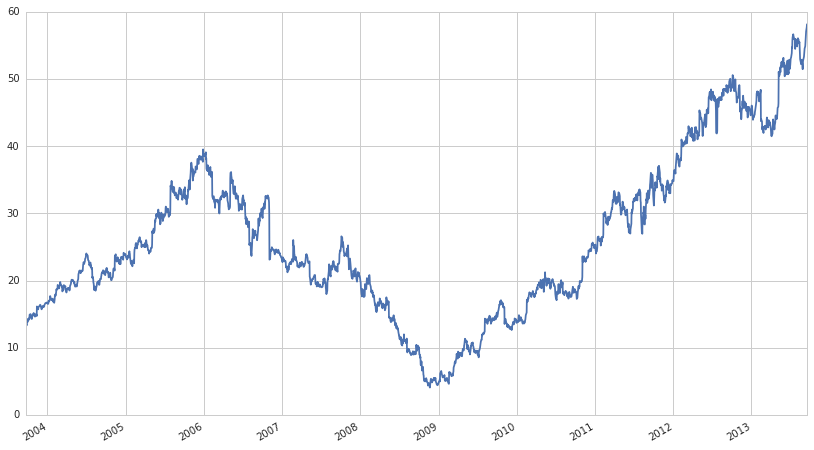

In [64]:
start = '2003-09-22'
end = '2013-09-17'
prices = get_pricing('WFM', fields='price', start_date=start, end_date=end)
prices.plot()

In [65]:
prices.describe()

count    2515.000000
mean       26.004168
std        12.064238
min         4.095000
25%        17.880000
50%        23.430000
75%        32.990000
max        58.150000
Name: Equity(8158 [WFM]), dtype: float64

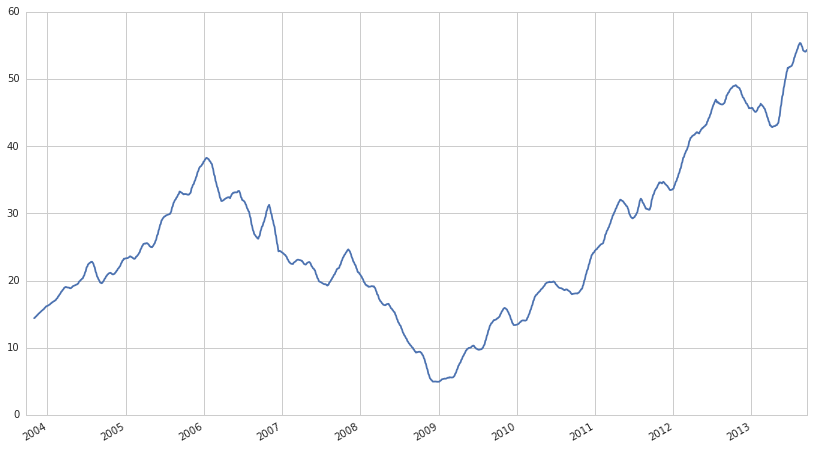

In [66]:
pd.rolling_mean(prices, 30).plot()

In [67]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm

In [68]:
prices.index

DatetimeIndex(['2003-09-22', '2003-09-23', '2003-09-24', '2003-09-25',
               '2003-09-26', '2003-09-29', '2003-09-30', '2003-10-01',
               '2003-10-02', '2003-10-03', 
               ...
               '2013-09-04', '2013-09-05', '2013-09-06', '2013-09-09',
               '2013-09-10', '2013-09-11', '2013-09-12', '2013-09-13',
               '2013-09-16', '2013-09-17'],
              dtype='datetime64[ns]', length=2515, freq=None, tz='UTC')

In [69]:
prices.values

array([ 13.638,  13.539,  13.308, ...,  57.11 ,  57.71 ,  58.15 ])

In [70]:
def linreg(X, Y):
    # fit
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # summarize and plot
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('SPY')
    plt.ylabel('WFM')
    return model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     1155.
Date:                Wed, 18 Nov 2015   Prob (F-statistic):          7.51e-219
Time:                        22:08:03   Log-Likelihood:                 8492.7
No. Observations:                3488   AIC:                        -1.698e+04
Df Residuals:                    3486   BIC:                        -1.697e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0004      0.000      0.986      0.324        -0.000     0.001
x1             0.9880      0.029     33.979      0.000         0.931     1.045
==============================================================================
Omnibus:                     2047.688   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           327316.963
Skew:                           1.755   Prob(JB):                         0.00
Kurtosis:                      50.327   Cond. No.                         81.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

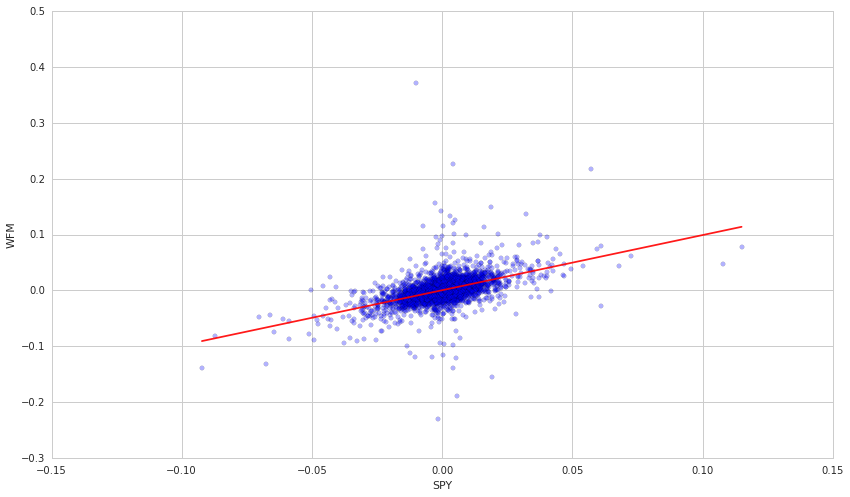

In [71]:
start = '2002-01-02'
end = '2015-11-09'
asset = get_pricing('WFM', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

linreg(r_b.values, r_a.values)

# Data

In [72]:
from odo import odo
import pandas as pd
from quantopian.interactive.data.eventvestor import clinical_trials_free as clinical_trials

In [73]:
# Blaze
clinical_trials.dshape

dshape("""var * {
  event_id: ?float64,
  asof_date: datetime,
  trade_date: ?datetime,
  symbol: ?string,
  event_type: ?string,
  event_headline: ?string,
  clinical_phase: ?string,
  clinical_scope: ?string,
  clinical_result: ?string,
  product_name: ?string,
  event_rating: ?float64,
  timestamp: datetime,
  sid: ?int64
  }""")

In [74]:
clinical_trials.count()

48448

In [75]:
clinical_trials[:3]

,event_id,asof_date,trade_date,symbol,event_type,event_headline,clinical_phase,clinical_scope,clinical_result,product_name,event_rating,timestamp,sid
0,138303,2007-01-03,2007-01-03,IMCL,Clinical Trials,ImClone Systems Commences Patient Treatment in...,Phase I,NaN,NaN,IMC-3G3,1,2007-01-04,3871
1,138180,2007-01-04,2007-01-04,DNA,Clinical Trials,Genentech Announces Positive Results From Rand...,Phase II,NaN,Positive,Pertuzumab,1,2007-01-05,24847
2,952759,2007-01-04,2007-01-04,VICL,Clinical Trials,Vical Initiates Pivotal Phase 3 Trial of Allov...,Phase III,NaN,NaN,Allovectin-7,1,2007-01-05,8763


In [76]:
phase_three = clinical_trials[clinical_trials.clinical_phase == "Phase III"][['timestamp', 'sid','product_name']].sort('timestamp')
phase_three

,timestamp,sid,product_name
0,2007-01-05,8763,Allovectin-7
1,2007-01-09,1416,FENTORA
2,2007-01-11,3871,ERBITUX
3,2007-01-25,8763,Allovectin-7
4,2007-02-09,24415,Xibrom
5,2007-02-23,24847,Avastin
6,2007-04-05,3871,ERBITUX (Cetuximab)
7,2007-04-11,3871,ERBITUX
8,2007-04-17,3871,ERBITUX (Cetuximab)
9,2007-04-26,23846,BEMA Fentanyl


In [77]:
gsk_sid = symbols('GSK').sid
gsk = clinical_trials[clinical_trials.sid == gsk_sid].sort('timestamp', ascending=False)
gsk_df = odo(gsk, pd.DataFrame)
# filter down to the Phase 4 trials
gsk_df = gsk_df[gsk_df.clinical_phase == "Phase III"]

In [78]:
gsk_df.head(1)

,event_id,asof_date,trade_date,symbol,event_type,event_headline,clinical_phase,clinical_scope,clinical_result,product_name,event_rating,timestamp,sid
0,1647384,2013-11-12,2013-11-12,GSK,Clinical Trials,GlaxoSmithKline Announces Phase III Stability ...,Phase III,NaN,Negative,Darapladib,1,2013-11-13,3242


In [79]:
gsk_df.drop(gsk_df.columns[[0, 2, 3, 7, 11, 12]], axis=1, inplace=True)

In [80]:
gsk_df = gsk_df[gsk_df.clinical_result != u'NaN']

In [81]:
gsk_df.head()

,asof_date,event_type,event_headline,clinical_phase,clinical_result,product_name,event_rating
0,2013-11-12,Clinical Trials,GlaxoSmithKline Announces Phase III Stability ...,Phase III,Negative,Darapladib,1
1,2013-09-05,Clinical Trials,GlaxoSmithKline's MAGE-A3 Vaccine Fails to Mee...,Phase III,Negative,MAGE-A3,1
2,2012-12-19,Clinical Trials,"GlaxoSmithKline, Amicus Therapeutics Announce ...",Phase III,Negative,Migalastat HCl,1
5,2012-07-11,Clinical Trials,Shionogi-ViiV Healthcare Reports Positive Init...,Phase III,Positive,ING114467,1
6,2012-07-11,Clinical Trials,GlaxoSmithKline Reports Positive Results in Ph...,Phase III,Positive,Albiglutide,1


In [82]:
gsk_prices = get_pricing('GSK', fields='price', start_date='2008-01-01', end_date='2014-01-01')

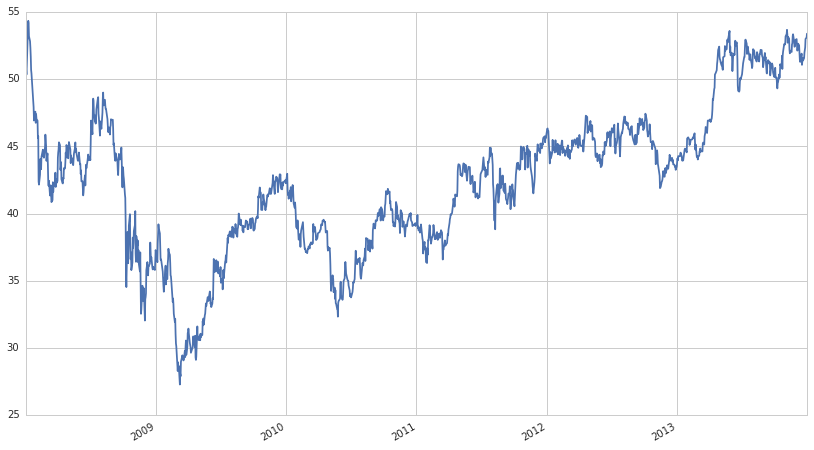

In [83]:
gsk_prices.plot()